<a href="https://colab.research.google.com/github/guilhermedossantos/TCC_NN_SARIMA/blob/master/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Primeiro teste de uma rede RNN em um SARIMA 

 - Foi gerado no R um processo $SARIMA(1,0,0)\times(1,0,0)$

In [0]:
#### SETUP ####
# Keras
from keras.models import Sequential # modelo
from keras.layers import Dense, SimpleRNN, LSTM, Reshape # camadas
from keras.callbacks import EarlyStopping # early stopping

# scaler
from sklearn.preprocessing import MinMaxScaler

# Importação do arquivo 
from google.colab import files # upload de arquivos da máquina
import pandas_datareader as web # pacote bem interessante que pode valer a pena explorar (para importação de dados de diversar fontes)

# Gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # usado no qq-plot
import plotly.tools as tls # para tentativa de converter mpl to plotly

# Removendo warnings
import warnings
warnings.filterwarnings('ignore') # tem também a opção 'once' para mostrar apenas uma vez

In [37]:
serie = pd.read_csv("https://raw.githubusercontent.com/guilhermedossantos/TCC_NN_SARIMA/master/serie_sarima.csv")
serie

,x
0,-0.281740
1,-2.822337
2,-0.385268
3,0.270453
4,-0.365296
...,...
1195,-1.075860
1196,0.434046
1197,-1.894967
1198,-1.868699


In [38]:
serie_original = serie

scaler = MinMaxScaler(feature_range=(0,1))
serie = scaler.fit_transform(serie_original)

x = np.array(serie[0:1199])
y = np.array(serie[1:])
x.shape
y.shape

(1199, 1)

In [39]:
treinox = x[0:1000].reshape((1000,1,1))
treinoy = y[0:1000].reshape((1000,1))
testex = x[1000:].reshape((-1,1,1))
testey = y[1000:].reshape((-1,1,))

print(testex.shape)
print(testey.shape)

(199, 1, 1)
(199, 1)


In [0]:
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape = (1,1)))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mape', 'mae', 'mse'])

In [41]:
model.fit(treinox, treinoy, epochs=5, validation_data=(testex,testey))

Train on 1000 samples, validate on 199 samples
Epoch 1/5
1000/1000 [==============================] - 0s 263us/step - loss: 0.1922 - mape: 133996.1250 - mae: 0.3902 - mse: 0.1922 - val_loss: 0.0862 - val_mape: 41.0023 - val_mae: 0.2759 - val_mse: 0.0862
Epoch 2/5
1000/1000 [==============================] - 0s 60us/step - loss: 0.0205 - mape: 239186.0781 - mae: 0.1129 - mse: 0.0205 - val_loss: 0.0098 - val_mape: 11.6019 - val_mae: 0.0790 - val_mse: 0.0098
Epoch 3/5
1000/1000 [==============================] - 0s 63us/step - loss: 0.0099 - mape: 265067.6562 - mae: 0.0799 - mse: 0.0099 - val_loss: 0.0087 - val_mape: 11.0220 - val_mae: 0.0742 - val_mse: 0.0087
Epoch 4/5
1000/1000 [==============================] - 0s 76us/step - loss: 0.0092 - mape: 254021.1562 - mae: 0.0774 - mse: 0.0092 - val_loss: 0.0090 - val_mape: 11.1457 - val_mae: 0.0755 - val_mse: 0.0090
Epoch 5/5
1000/1000 [==============================] - 0s 69us/step - loss: 0.0087 - mape: 241689.3125 - mae: 0.0751 - mse: 0.00

In [42]:
model.evaluate(testex,testey)

199/199 [==============================] - 0s 45us/step


[0.008374948559993475,
 10.79785442352295,
 0.0727582722902298,
 0.008374948985874653]

24.9336383411099
5.787536508150003
1.8808374230701839
[-9.1261685]
[-9.376413]


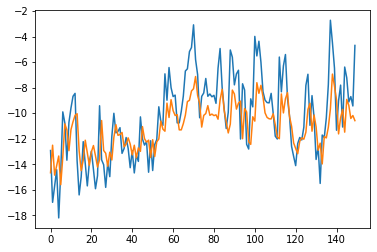

In [43]:
preds = model.predict(testex)
preds_original = scaler.inverse_transform(preds)[:150] # para momentos mais a frente a performance do modelo piora

y_original = scaler.inverse_transform(testey)[:150]

mape = np.mean(abs((y_original - preds_original)/abs(y_original))*100)
mae = np.mean(abs(y_original - preds_original))
mse = np.mean((y_original - preds_original)**2)


print(mape)
print(mse)
print(mae)

plt.plot(y_original)
plt.plot(preds_original)

print(y_original[-4])
print(preds_original[-4])

In [0]:
#model2 = Sequential()
#model2.add(SimpleRNN(1, activation='relu', input_shape = (1,1)))
#model2.add(Dense(1, activation='linear'))

#model2.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mape', 'mae', 'mse'])

In [45]:
#model2.fit(treinox, treinoy, epochs = 10)

Epoch 1/10
1000/1000 [==============================] - 0s 219us/step - loss: 0.2849 - mape: 17834.6543 - mae: 0.5044 - mse: 0.2849
Epoch 2/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.2543 - mape: 50238.2969 - mae: 0.4732 - mse: 0.2543
Epoch 3/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.2264 - mape: 86977.6328 - mae: 0.4432 - mse: 0.2264
Epoch 4/10
1000/1000 [==============================] - 0s 47us/step - loss: 0.2011 - mape: 111488.5312 - mae: 0.4145 - mse: 0.2011
Epoch 5/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.1785 - mape: 124887.7891 - mae: 0.3870 - mse: 0.1785
Epoch 6/10
1000/1000 [==============================] - 0s 41us/step - loss: 0.1582 - mape: 161270.4844 - mae: 0.3609 - mse: 0.1582
Epoch 7/10
1000/1000 [==============================] - 0s 52us/step - loss: 0.1402 - mape: 183948.0000 - mae: 0.3364 - mse: 0.1402
Epoch 8/10
1000/1000 [==============================] - 0s 48us/step - loss: 0

In [0]:
#preds = model2.predict(testex)
#preds_original = scaler.inverse_transform(preds)

#y_original = scaler.inverse_transform(testey)

#mape = np.mean(abs((y_original - preds_original)/y_original)*100)
#mae = np.mean(abs(y_original - preds_original))
#mse = np.mean((y_original - preds_original)**2)


#print(mape)
#print(mse)
#print(mae)